<a href="https://colab.research.google.com/github/comparativechrono/computational_biology_notebooks/blob/main/2D_difference_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

`Course:` **Mathematical & Computational Biology**  
`Module:` 2-D linear difference systems  
`Author:` Tim Hearn  
`License:` CC-BY-4.0

# Tutorial: Solving 2-D Linear Difference Systems

In this notebook you will:
1. Set up a 2‑dimensional linear difference equation that captures a simple host–parasite interaction (susceptible vs infected hosts).
2. Compute the **eigenvalues** and **eigenvectors** of the system matrix.
3. Decompose an **initial condition** into the eigenbasis and write the **closed‑form solution**.
4. Compare the analytical solution with an explicit iteration (for‑loop).
5. Visualise how changing interaction rates affects stability.

> **Learning outcome:** You should be able to predict long‑term dynamics of discrete‑time biological systems _without_ stepping through every generation.

## Prerequisites
This lab assumes you are comfortable with:
* Basic linear algebra (matrix multiplication, eigenvalues/eigenvectors).
* Python basics and the `numpy` & `matplotlib` libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Larger default plot size & font
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 12


## 1. Define the host–parasite system

We model two discrete‑time state variables:
* $H_t$ – number (or proportion) of **healthy** hosts at time $t$.
* $P_t$ – number (or proportion) of **parasitised** hosts at time $t$.

A linearised dynamics near an equilibrium might be

$$
\begin{bmatrix}H_{t+1}\\ P_{t+1}\end{bmatrix} = \begin{bmatrix}0.8 & 0.1\\0.2 & 0.9\end{bmatrix}\begin{bmatrix}H_t\\ P_t\end{bmatrix}.
$$

Feel free to edit the coefficients in the next cell.

In [2]:
# System matrix A
A = np.array([[0.8, 0.1],
              [0.2, 0.9]])

# Initial condition (edit as desired)
x0 = np.array([0.9, 0.1])   # 90% healthy, 10% parasitised

print("A =\n", A)
print("x0 =", x0)


A =
 [[0.8 0.1]
 [0.2 0.9]]
x0 = [0.9 0.1]


## 2. Compute eigenvalues and eigenvectors

In [3]:
eigvals, eigvecs = np.linalg.eig(A)
print("Eigenvalues:", eigvals)
print("\nEigenvectors (columns):\n", eigvecs)


Eigenvalues: [0.7 1. ]

Eigenvectors (columns):
 [[-0.70710678 -0.4472136 ]
 [ 0.70710678 -0.89442719]]


**Q1:** Based on the magnitudes of the eigenvalues, do you expect the system to grow, decay, or remain constant as $t \to \infty$?

*Write your prediction before proceeding.*

## 3. Decompose the initial state

In [4]:
# Solve x0 = V * c  (where V holds eigenvectors as columns)
V = eigvecs
c = np.linalg.solve(V, x0)
print("Coefficients in eigenbasis (c):", c)


Coefficients in eigenbasis (c): [-0.80138769 -0.74535599]


## 4. Closed‑form solution vs simulation

In [5]:
def closed_form(t, V, eigvals, c):
    return V @ np.diag(eigvals**t) @ c

def simulate_steps(A, x0, T):
    xs = np.zeros((T+1, 2))
    xs[0] = x0
    for t in range(T):
        xs[t+1] = A @ xs[t]
    return xs

T = 20  # number of steps
times = np.arange(T+1)

# Simulation
sim = simulate_steps(A, x0, T)

# Closed-form
cf = np.array([closed_form(t, V, eigvals, c) for t in times])

print("Max |difference| between methods:", np.max(np.abs(sim - cf)))


Max |difference| between methods: 5.551115123125783e-16


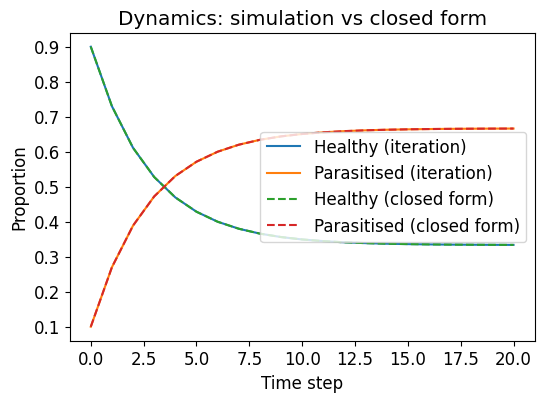

In [6]:
plt.plot(times, sim[:,0], label='Healthy (iteration)')
plt.plot(times, sim[:,1], label='Parasitised (iteration)')
plt.plot(times, cf[:,0], '--', label='Healthy (closed form)')
plt.plot(times, cf[:,1], '--', label='Parasitised (closed form)')
plt.xlabel('Time step')
plt.ylabel('Proportion')
plt.title('Dynamics: simulation vs closed form')
plt.legend()
plt.show()


**Q2:** Do the simulation and closed‑form curves overlap? Why is that important?

**Q3:** What steady‑state mixture (ratio $P/H$) does the system approach as $t\to\infty$? Relate your answer to the eigenvector of the dominant eigenvalue.

## 5. Explore the stability boundary

Let’s see how changing the off‑diagonal interaction parameters ($a_{12}$ or $a_{21}$) alters the dominant eigenvalue’s magnitude.

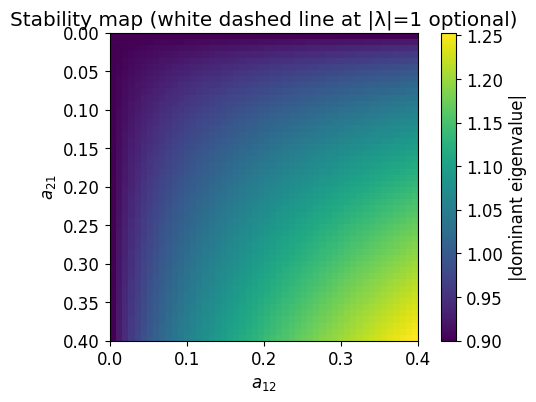

In [7]:
def dominant_eigenvalue(a12, a21):
    A = np.array([[0.8, a12],
                  [a21, 0.9]])
    lam = np.linalg.eigvals(A)
    return max(np.abs(lam))

grid = np.linspace(0, 0.4, 50)
dom = np.array([[dominant_eigenvalue(a12, a21) for a12 in grid] for a21 in grid])

plt.imshow(dom, extent=[grid[0], grid[-1], grid[-1], grid[0]], origin='upper')
plt.colorbar(label='|dominant eigenvalue|')
plt.xlabel('$a_{12}$')
plt.ylabel('$a_{21}$')
plt.title('Stability map (white dashed line at |λ|=1 optional)')
plt.show()


**Q4:** From the heat‑map above, identify regions where the system is stable ($|\lambda_{max}| < 1$). What biological interpretation can you give to these parameter combinations?

## 6. Extension

Replace the 2×2 matrix with a larger Leslie matrix (age‑structured population). Compute its dominant eigenvalue and interpret it as the intrinsic growth rate $r_0$. Try this on your own!

---
Created on 2025-11-20